In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
train = pd.read_csv("../dataset/titanic_train.csv")
test = pd.read_csv("../dataset/titanic_test.csv")
datas = [train, test]
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
for data in datas:
    print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


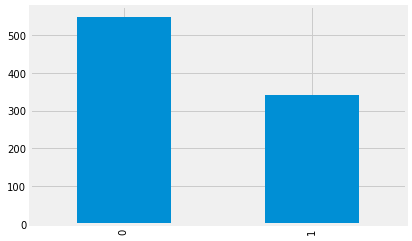

In [4]:
train['Survived'].value_counts().plot.bar()

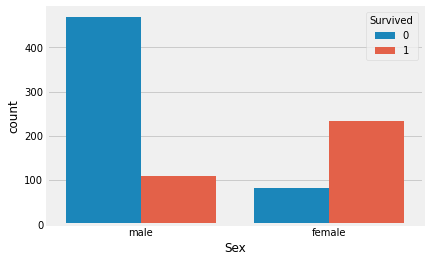

In [6]:
sns.countplot('Sex', hue='Survived', data=train)

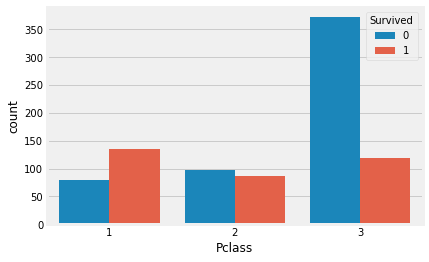

In [7]:
sns.countplot('Pclass', hue='Survived', data=train)

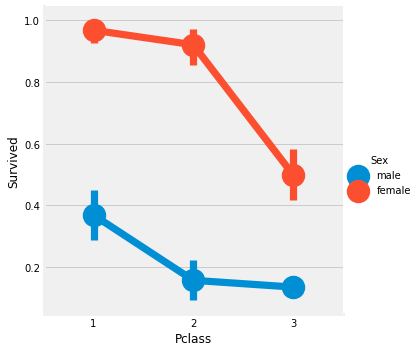

In [8]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)

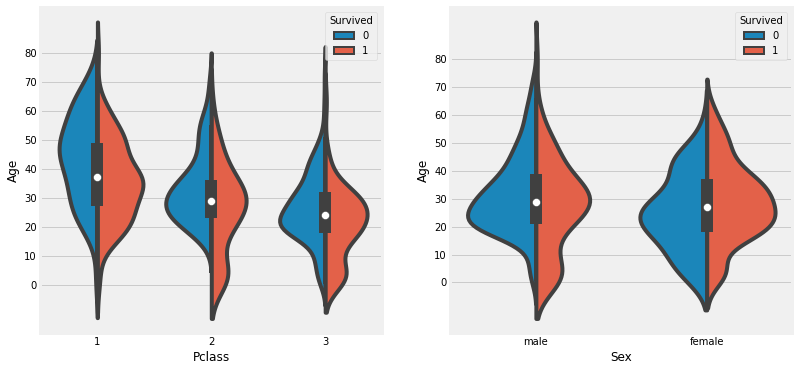

In [9]:
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, split=True, ax=ax[0])
ax[0].set_yticks(range(0,90,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=train, split=True, ax=ax[1])
ax[1].set_yticks(range(0, 90, 10))

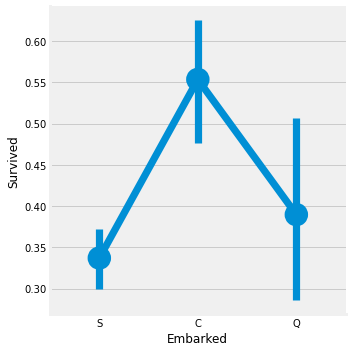

In [10]:
sns.factorplot('Embarked', 'Survived', data=train)

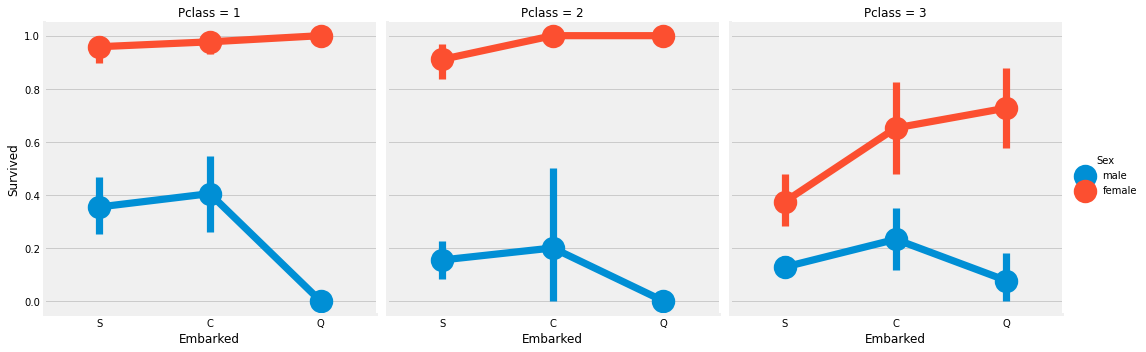

In [11]:
sns.factorplot('Embarked', 'Survived', hue='Sex', col='Pclass', data=train)

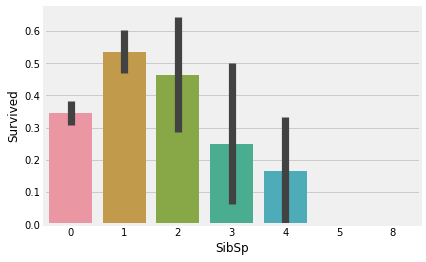

In [12]:
sns.barplot('SibSp', 'Survived', data=train)

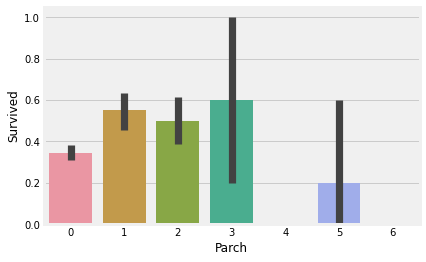

In [13]:
sns.barplot('Parch', 'Survived', data=train)

In [14]:
del train, test, datas

In [15]:
train = pd.read_csv("../dataset/titanic_train.csv")
test = pd.read_csv("../dataset/titanic_test.csv")
passenger = test['PassengerId']
datas = [train, test]

In [16]:
for data in datas:
    data['Initial'] = 0
    data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [17]:
train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [18]:
for data in datas:
    data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)

In [19]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [20]:
for data in datas:
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mr'), 'Age'] = 33
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Master'), 'Age'] = 5
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mrs'), 'Age'] = 36
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Miss'), 'Age'] = 22
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Other'), 'Age'] = 46

In [21]:
print(datas[0]['Age'].isnull().sum())
print(datas[1]['Age'].isnull().sum())
print(datas[0]['Initial'].unique())
print(datas[1]['Initial'].unique())

0
0
['Mr' 'Mrs' 'Miss' 'Master' 'Other']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


In [22]:
for data in datas:
    data['Embarked'].fillna('S', inplace=True)

In [23]:
print(datas[0]['Embarked'].isnull().sum())
print(datas[1]['Embarked'].isnull().sum())

0
0


In [50]:
for data in datas:
    data['Fare'] = data["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

<function <lambda> at 0x7ff9a93595e0>
<function <lambda> at 0x7ff9a93595e0>


In [49]:
train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone
0,0,3,0,1,0,1.981001,0,0,1,1,0
1,1,1,1,1,0,4.266662,1,1,2,1,0
2,1,3,1,0,0,2.070022,0,2,1,0,1
3,1,1,1,1,0,3.972177,0,1,2,1,0
4,0,3,0,0,0,2.085672,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,2.564949,0,4,1,0,1
887,1,1,1,0,0,3.401197,0,2,1,0,1
888,0,3,1,1,2,3.154870,0,2,1,3,0
889,1,1,0,0,0,3.401197,1,0,1,0,1


In [25]:
for data in datas:
    data['Age_band']=0
    data.loc[data['Age']<=16,'Age_band']=0
    data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
    data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
    data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
    data.loc[data['Age']>64,'Age_band']=4

In [26]:
for data in datas:
    data['Family_Size']=0
    data['Family_Size']=data['Parch']+data['SibSp']
    data['Alone']=0
    data.loc[data.Family_Size==0,'Alone']=1

In [27]:
for data in datas:
    data['Sex'].replace(['male','female'],[0,1],inplace=True)
    data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
    data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [28]:
for data in datas:
    data.drop(['Name','Age','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [29]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Initial', 'Age_band', 'Family_Size', 'Alone'],
      dtype='object')

In [30]:
test.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Initial',
       'Age_band', 'Family_Size', 'Alone'],
      dtype='object')

In [31]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone
0,0,3,0,1,0,1.981001,0,0,1,1,0
1,1,1,1,1,0,4.266662,1,1,2,1,0
2,1,3,1,0,0,2.070022,0,2,1,0,1
3,1,1,1,1,0,3.972177,0,1,2,1,0
4,0,3,0,0,0,2.085672,0,0,2,0,1


## make model

In [32]:
X=train[train.columns[1:]]
Y=train['Survived']

In [33]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
, StratifiedKFold, learning_curve

kfold = StratifiedKFold(n_splits=10)

In [34]:
decisionTree = DecisionTreeClassifier()

ada = AdaBoostClassifier(decisionTree, random_state=0)

## 그리드 서치
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2,3],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

decision_grid = GridSearchCV(ada, param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

decision_grid.fit(X,Y)

ada_best = decision_grid.best_estimator_
decision_grid.best_score_

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 1680 out of 1680 | elapsed:    4.4s finished


0.8125218476903872

In [35]:
rf = RandomForestClassifier()


## 그리드 서치
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300, 500, 700, 800, 900]
              }


rf_grid = GridSearchCV(rf,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

rf_grid.fit(X,Y)

rf_best = rf_grid.best_estimator_
rf_grid.best_score_

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  66 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done 216 tasks      | elapsed:   31.4s
[Parallel(n_jobs=4)]: Done 466 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 816 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 1266 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 1620 out of 1620 | elapsed:  5.5min finished


0.8373033707865168

In [36]:
gradient_boost = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150,200],
              'max_features': [0.3, 0.1] 
              }

gb_grid = GridSearchCV(gradient_boost,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gb_grid.fit(X,Y)

gb_best = gb_grid.best_estimator_
gb_grid.best_score_

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:   13.9s
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:   20.6s finished


0.8193133583021224

In [38]:
svc = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 0.5, 1],
                  'C': [0.01, 0.1, 1, 10, 50, 100,200,300]}

svc_grid = GridSearchCV(svc,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

svc_grid.fit(X,Y)

svc_best = svc_grid.best_estimator_
svc_grid.best_score_
#svc_grid.best_params_

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   10.0s finished


0.8316479400749064

In [39]:
vote = VotingClassifier(estimators=[('rf', rf_best), ('ada', ada_best),
('svc', svc_best), ('gb',gb_best)], voting='soft', n_jobs=4)

vote_result = vote.fit(X,Y)

In [40]:
pred = vote.predict(test)

In [55]:
test

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone
0,3,0,0,0,0.721667,2,0,2,0,1
1,3,1,1,0,0.665730,0,1,2,1,0
2,2,0,0,0,0.820148,2,0,3,0,1
3,3,0,0,0,0.769647,0,0,1,0,1
4,3,1,1,1,0.919718,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,0.735091,0,0,2,0,1
414,1,1,0,0,1.545524,1,4,2,0,1
415,3,0,0,0,0.683603,0,0,2,0,1
416,3,0,0,0,0.735091,0,0,2,0,1


In [41]:
submission = pd.DataFrame({
   'PassengerId' : passenger,
   'Survived' : pred
})

In [43]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [ ]:
vote.get_params()

In [57]:
test

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone
0,3,0,0,0,0.721667,2,0,2,0,1
1,3,1,1,0,0.665730,0,1,2,1,0
2,2,0,0,0,0.820148,2,0,3,0,1
3,3,0,0,0,0.769647,0,0,1,0,1
4,3,1,1,1,0.919718,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,0.735091,0,0,2,0,1
414,1,1,0,0,1.545524,1,4,2,0,1
415,3,0,0,0,0.683603,0,0,2,0,1
416,3,0,0,0,0.735091,0,0,2,0,1
